In [20]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

# Reading historical data for 42 large-cap tech stocks
tickers = ['AAPL', 'ACN', 'ADI', 'ADP', 'ADS', 'ADSK', 'ANSS', 'APH', 'BABA', 'BIDU', 'BR', 'CRM', 'CTXS', 'FB', 
'FFIV', 'FIS', 'FISV','GOOG', 'GPN', 'IBM','INTC', 'INTU', 'IPGP', 'IT', 'JKHY', 'KEYS', 'KLAC', 'LRCX', 'MA', 'MCHP', 'MSFT',
'MSI', 'NVDA', 'NXPI', 'PYPL', 'SNPS', 'TEL', 'TTWO', 'TXN', 'V', 'VRSN', 'XLNX']

data = yf.download(tickers,'2015-1-1', '2021-7-1')['Adj Close']

[*********************100%***********************]  42 of 42 completed

3 Failed downloads:
- FB: No data found for this date range, symbol may be delisted
- ADS: No data found for this date range, symbol may be delisted
- XLNX: No data found for this date range, symbol may be delisted


In [21]:
data

,AAPL,ACN,ADI,ADP,ADS,ADSK,ANSS,APH,BABA,BIDU,...,NVDA,NXPI,PYPL,SNPS,TEL,TTWO,TXN,V,VRSN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,24.603201,77.739204,46.931934,70.383057,NaN,59.529999,81.639999,24.877781,103.599998,223.080002,...,4.836186,72.557587,NaN,43.099998,54.181637,28.100000,43.324066,62.743172,57.189999,NaN
2015-01-05,23.910095,76.426628,46.078476,70.332359,NaN,58.660000,80.860001,24.423265,101.000000,219.789993,...,4.754503,71.792442,NaN,42.540001,53.126644,27.620001,42.651680,61.358204,56.240002,NaN
2015-01-06,23.912348,75.875343,44.996872,69.749268,NaN,57.500000,79.260002,24.112520,103.320000,220.179993,...,4.610353,68.372849,NaN,42.160000,52.483360,27.930000,41.946892,60.962826,55.180000,NaN
2015-01-07,24.247650,77.467949,45.470074,70.357674,NaN,57.380001,79.709999,24.525303,102.129997,224.350006,...,4.598341,70.214882,NaN,42.209999,54.061565,28.100000,42.700287,61.779613,55.639999,NaN
2015-01-08,25.179298,78.649261,46.272827,71.971718,NaN,58.799999,81.660004,25.003010,105.029999,229.210007,...,4.771319,73.530563,NaN,42.860001,55.150856,28.459999,43.396965,62.608215,56.880001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,132.248734,285.977295,163.347473,191.618774,NaN,286.959991,341.549988,67.167084,218.380005,194.770004,...,191.867325,199.716553,293.209991,273.799988,130.615356,175.059998,181.289719,233.735733,229.429993,NaN
2021-06-25,131.951355,289.017914,163.953781,192.869644,NaN,288.739990,343.480011,67.058495,228.500000,202.639999,...,190.124023,200.049683,289.600006,268.970001,130.771729,173.820007,180.866791,234.804291,227.729996,NaN
2021-06-28,133.606827,288.272491,166.799438,192.156235,NaN,293.359985,349.130005,67.522453,228.589996,205.179993,...,199.654724,202.019135,293.649994,274.029999,130.019165,178.089996,184.096344,231.608521,228.690002,NaN


In [22]:
daily_stock_returns = (data-data.shift(1))/data.shift(1)
daily_stock_returns

,AAPL,ACN,ADI,ADP,ADS,ADSK,ANSS,APH,BABA,BIDU,...,NVDA,NXPI,PYPL,SNPS,TEL,TTWO,TXN,V,VRSN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028171,-0.016884,-0.018185,-0.000720,NaN,-0.014614,-0.009554,-0.018270,-0.025097,-0.014748,...,-0.016890,-0.010545,NaN,-0.012993,-0.019471,-0.017082,-0.015520,-0.022074,-0.016611,NaN
2015-01-06,0.000094,-0.007213,-0.023473,-0.008291,NaN,-0.019775,-0.019787,-0.012723,0.022970,0.001774,...,-0.030319,-0.047632,NaN,-0.008933,-0.012108,0.011224,-0.016524,-0.006444,-0.018848,NaN
2015-01-07,0.014022,0.020990,0.010516,0.008723,NaN,-0.002087,0.005677,0.017119,-0.011518,0.018939,...,-0.002605,0.026941,NaN,0.001186,0.030071,0.006087,0.017961,0.013398,0.008336,NaN
2015-01-08,0.038422,0.015249,0.017655,0.022941,NaN,0.024747,0.024464,0.019478,0.028395,0.021663,...,0.037618,0.047222,NaN,0.015399,0.020149,0.012811,0.016316,0.013412,0.022286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,-0.002169,0.020511,0.020840,0.004354,NaN,0.011598,0.007522,0.009047,0.016383,0.029603,...,0.007779,0.023500,0.017666,0.018374,0.011122,0.018501,0.013487,0.006647,0.013786,NaN
2021-06-25,-0.002249,0.010632,0.003712,0.006528,NaN,0.006203,0.005651,-0.001617,0.046341,0.040407,...,-0.009086,0.001668,-0.012312,-0.017641,0.001197,-0.007083,-0.002333,0.004572,-0.007410,NaN
2021-06-28,0.012546,-0.002579,0.017356,-0.003699,NaN,0.016001,0.016449,0.006919,0.000394,0.012535,...,0.050129,0.009845,0.013985,0.018812,-0.005755,0.024566,0.017856,-0.013610,0.004216,NaN


In [23]:
#daily_stock_returns.dropna(inplace=True)

# Assigning ranks in order of decreasing daily returns
df_rank = daily_stock_returns.rank(axis=1, ascending=False, method='min')

In [24]:
# Generating trade signal on the basis of ranks
df_signal = df_rank.copy()
for ticker in tickers:
    df_signal[ticker] = np.where(df_signal[ticker] < 22, -1, 1)

# Calculating returns on the basis of our trade signals
returns = df_signal.mul(daily_stock_returns.shift(-1), axis=0)

# Summing returns over all stocks to get final returns 
strategy_returns = np.sum(returns, axis=1)/len(tickers)

In [25]:
returns

,AAPL,ACN,ADI,ADP,ADS,ADSK,ANSS,APH,BABA,BIDU,...,NVDA,NXPI,PYPL,SNPS,TEL,TTWO,TXN,V,VRSN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,-0.028171,-0.016884,-0.018185,-0.000720,NaN,-0.014614,-0.009554,-0.018270,-0.025097,-0.014748,...,-0.016890,-0.010545,NaN,-0.012993,-0.019471,-0.017082,-0.015520,-0.022074,-0.016611,NaN
2015-01-05,0.000094,0.007213,-0.023473,0.008291,NaN,0.019775,0.019787,-0.012723,0.022970,-0.001774,...,0.030319,0.047632,NaN,0.008933,-0.012108,0.011224,0.016524,-0.006444,0.018848,NaN
2015-01-06,-0.014022,-0.020990,0.010516,-0.008723,NaN,-0.002087,0.005677,-0.017119,0.011518,-0.018939,...,-0.002605,0.026941,NaN,-0.001186,-0.030071,-0.006087,0.017961,-0.013398,0.008336,NaN
2015-01-07,-0.038422,-0.015249,-0.017655,0.022941,NaN,0.024747,0.024464,-0.019478,0.028395,-0.021663,...,0.037618,-0.047222,NaN,0.015399,-0.020149,0.012811,-0.016316,-0.013412,0.022286,NaN
2015-01-08,-0.001073,-0.001113,0.000730,0.007162,NaN,0.009014,0.011021,0.005750,0.019137,0.010078,...,-0.004028,-0.031861,NaN,0.001633,0.005910,-0.020731,0.000560,-0.014823,-0.008087,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,-0.002249,-0.010632,-0.003712,0.006528,NaN,-0.006203,0.005651,-0.001617,-0.046341,-0.040407,...,-0.009086,-0.001668,0.012312,0.017641,-0.001197,0.007083,0.002333,0.004572,0.007410,NaN
2021-06-25,0.012546,0.002579,-0.017356,0.003699,NaN,-0.016001,-0.016449,0.006919,-0.000394,-0.012535,...,0.050129,0.009845,0.013985,0.018812,-0.005755,0.024566,0.017856,0.013610,0.004216,NaN
2021-06-28,-0.011500,0.008608,-0.004866,0.005035,NaN,-0.014930,-0.009738,-0.001462,0.003718,-0.012136,...,-0.002089,-0.007372,0.003031,-0.007846,0.016012,-0.000056,-0.007049,0.007946,0.004766,NaN


In [26]:
daily_stock_returns

,AAPL,ACN,ADI,ADP,ADS,ADSK,ANSS,APH,BABA,BIDU,...,NVDA,NXPI,PYPL,SNPS,TEL,TTWO,TXN,V,VRSN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028171,-0.016884,-0.018185,-0.000720,NaN,-0.014614,-0.009554,-0.018270,-0.025097,-0.014748,...,-0.016890,-0.010545,NaN,-0.012993,-0.019471,-0.017082,-0.015520,-0.022074,-0.016611,NaN
2015-01-06,0.000094,-0.007213,-0.023473,-0.008291,NaN,-0.019775,-0.019787,-0.012723,0.022970,0.001774,...,-0.030319,-0.047632,NaN,-0.008933,-0.012108,0.011224,-0.016524,-0.006444,-0.018848,NaN
2015-01-07,0.014022,0.020990,0.010516,0.008723,NaN,-0.002087,0.005677,0.017119,-0.011518,0.018939,...,-0.002605,0.026941,NaN,0.001186,0.030071,0.006087,0.017961,0.013398,0.008336,NaN
2015-01-08,0.038422,0.015249,0.017655,0.022941,NaN,0.024747,0.024464,0.019478,0.028395,0.021663,...,0.037618,0.047222,NaN,0.015399,0.020149,0.012811,0.016316,0.013412,0.022286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,-0.002169,0.020511,0.020840,0.004354,NaN,0.011598,0.007522,0.009047,0.016383,0.029603,...,0.007779,0.023500,0.017666,0.018374,0.011122,0.018501,0.013487,0.006647,0.013786,NaN
2021-06-25,-0.002249,0.010632,0.003712,0.006528,NaN,0.006203,0.005651,-0.001617,0.046341,0.040407,...,-0.009086,0.001668,-0.012312,-0.017641,0.001197,-0.007083,-0.002333,0.004572,-0.007410,NaN
2021-06-28,0.012546,-0.002579,0.017356,-0.003699,NaN,0.016001,0.016449,0.006919,0.000394,0.012535,...,0.050129,0.009845,0.013985,0.018812,-0.005755,0.024566,0.017856,-0.013610,0.004216,NaN


<AxesSubplot:xlabel='Date'>

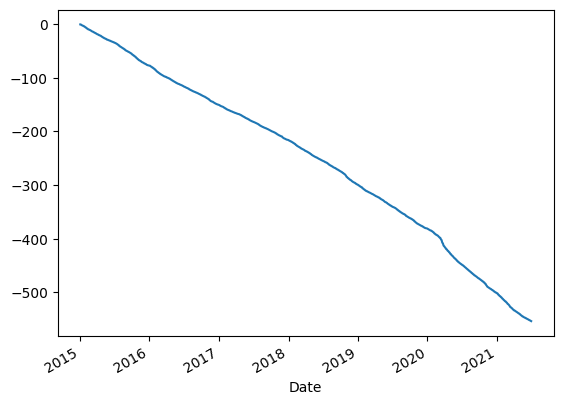

In [37]:
pnl = df_signal * daily_stock_returns
pnl['pnll'] = pnl.sum(axis = 1)
pnl.pnll.cumsum().plot()

In [36]:
data.diff(1)

,AAPL,ACN,ADI,ADP,ADS,ADSK,ANSS,APH,BABA,BIDU,...,NVDA,NXPI,PYPL,SNPS,TEL,TTWO,TXN,V,VRSN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.693106,-1.312576,-0.853458,-0.050697,NaN,-0.869999,-0.779999,-0.454515,-2.599998,-3.290009,...,-0.081684,-0.765144,NaN,-0.559998,-1.054993,-0.480000,-0.672386,-1.384968,-0.949997,NaN
2015-01-06,0.002253,-0.551285,-1.081604,-0.583092,NaN,-1.160000,-1.599998,-0.310745,2.320000,0.389999,...,-0.144150,-3.419594,NaN,-0.380001,-0.643284,0.309999,-0.704788,-0.395378,-1.060001,NaN
2015-01-07,0.335302,1.592606,0.473202,0.608406,NaN,-0.119999,0.449997,0.412783,-1.190002,4.170013,...,-0.012012,1.842033,NaN,0.049999,1.578205,0.170000,0.753395,0.816788,0.459999,NaN
2015-01-08,0.931648,1.181313,0.802753,1.614044,NaN,1.419998,1.950005,0.477707,2.900002,4.860001,...,0.172978,3.315681,NaN,0.650002,1.089291,0.359999,0.696678,0.828602,1.240002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,-0.287476,5.747803,3.334610,0.830673,NaN,3.289978,2.549988,0.602188,3.520004,5.600006,...,1.481064,4.585556,5.089996,4.940002,1.436737,3.179993,2.412582,1.543488,3.119995,NaN
2021-06-25,-0.297379,3.040619,0.606308,1.250870,NaN,1.779999,1.930023,-0.108589,10.119995,7.869995,...,-1.743301,0.333130,-3.609985,-4.829987,0.156372,-1.239990,-0.422928,1.068558,-1.699997,NaN
2021-06-28,1.655472,-0.745422,2.845657,-0.713409,NaN,4.619995,5.649994,0.463959,0.089996,2.539993,...,9.530701,1.969452,4.049988,5.059998,-0.752563,4.269989,3.229553,-3.195770,0.960007,NaN
